In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/etron/Data Science/Data/9mo_pull.csv')

In [4]:
print df.shape
print df.dtypes
df.head()

(99944, 6)
member_id     int64
tier         object
country      object
source       object
tenure        int64
active        int64
dtype: object


,member_id,tier,country,source,tenure,active
0,12428284,Platinum,Germany,referral,6,0
1,39743027,Platinum,France,referral,1,0
2,59559187,Silver,UK,organic,1,0
3,46170183,Silver,UK,organic,4,0
4,14600427,Gold,France,organic,1,0


In [30]:
df.groupby(['tier','source']).agg({'tenure': ['mean', 'count'], 'active': ['mean']}).round(3)

active tenure       
                        mean   mean  count
tier     source                           
Gold     organic       0.012  1.816  49560
         partnerships  0.095  3.092   7336
         referral      0.298  5.128   2942
Platinum organic       0.002  1.319   8814
         partnerships  0.028  1.883   1271
         referral      0.117  3.033    549
Silver   organic       0.143  3.528  24462
         partnerships  0.285  4.949   3593
         referral      0.478  6.504   1417

In [5]:
for i in ['tier', 'country', 'source']:
    print df.groupby(i).agg({'tenure': 'mean', 'active': 'mean'})

            active    tenure
tier                        
Gold      0.036265  2.135716
Platinum  0.011191  1.474704
Silver    0.176540  3.844327
               active    tenure
country                        
Canada       0.220897  3.901001
France       0.038984  2.062140
Germany      0.056645  2.496410
Italy        0.038413  2.076721
Netherlands  0.171980  3.350356
Spain        0.034483  2.041998
UK           0.059169  2.527422
US           0.057965  2.537259
                active    tenure
source                          
organic       0.049689  2.268953
partnerships  0.144098  3.513115
referral      0.329666  5.290954


In [6]:
for i in ['tier', 'country', 'source']:
    print df.groupby(i).agg({'tenure': 'mean', 'active': 'mean'})

            active    tenure
tier                        
Gold      0.036265  2.135716
Platinum  0.011191  1.474704
Silver    0.176540  3.844327
               active    tenure
country                        
Canada       0.220897  3.901001
France       0.038984  2.062140
Germany      0.056645  2.496410
Italy        0.038413  2.076721
Netherlands  0.171980  3.350356
Spain        0.034483  2.041998
UK           0.059169  2.527422
US           0.057965  2.537259
                active    tenure
source                          
organic       0.049689  2.268953
partnerships  0.144098  3.513115
referral      0.329666  5.290954


In [7]:
dummies = pd.get_dummies(df.drop('member_id',axis=1))
dummies.head()

,tenure,active,tier_Gold,tier_Platinum,tier_Silver,country_Canada,country_France,country_Germany,country_Italy,country_Netherlands,country_Spain,country_UK,country_US,source_organic,source_partnerships,source_referral
0,6,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,4,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [8]:
### Only 9 Months tenure are still active - all have same sign up date ###

df.groupby('tenure').agg({'active':'mean'})

,active
tenure,
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, partial_dependence
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import explained_variance_score

In [10]:
def gbm_acc(features, target, test_size, random_state = 69):
    
    X_train, X_test, y_train, y_test = train_test_split(features,
                                                        target,
                                                        test_size = test_size,
                                                        random_state = random_state)
    gbm = GradientBoostingClassifier()
    gbm.fit(X_train, y_train)
    pred = gbm.predict_proba(X_test)
    pred = [p[1] for p in pred]
    return(roc_auc_score(y_test, pred))
    

In [11]:
dummies = pd.get_dummies(df)
y = dummies['active']
x = dummies.drop(['active','tenure','member_id'],axis=1)

In [12]:
x.head()

,tier_Gold,tier_Platinum,tier_Silver,country_Canada,country_France,country_Germany,country_Italy,country_Netherlands,country_Spain,country_UK,country_US,source_organic,source_partnerships,source_referral
0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [13]:
iterations = 5

for i in range(iterations):
    print gbm_acc(x, y, 0.3, i)

0.880379588157
0.885223491936
0.879685420209
0.882663679392
0.881744712208


In [14]:
plat = dummies[dummies['tier_Platinum'] == 1]
gold = dummies[dummies['tier_Gold'] == 1]
silver = dummies[dummies['tier_Silver'] == 1]

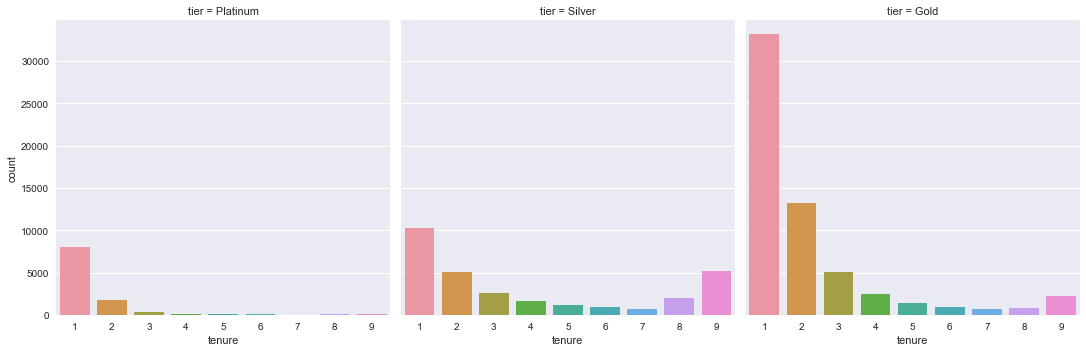

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.factorplot(x = "tenure",   # categorical variable on the x axis, 
               col = "tier",   # categorical variable split apart into adjacent plots
               data = df,      # data source
               kind = "count", # plot type - one of [point, bar, count, box, violin, strip]
               size = 5)       # size of the plot
               

plt.show()

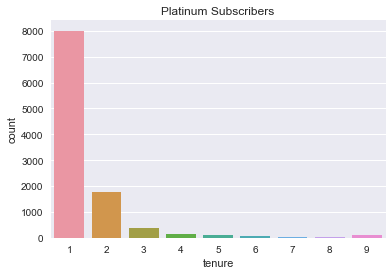

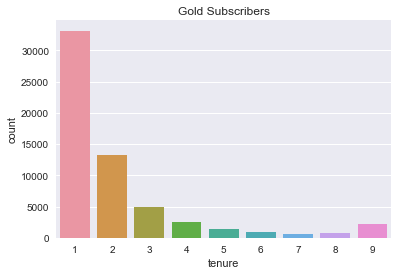

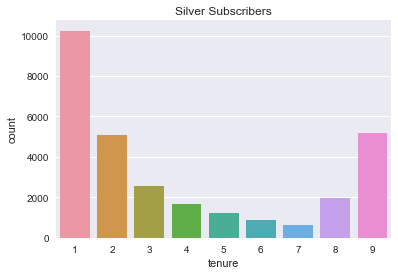

In [31]:
import seaborn as sns

sns.countplot(x = 'tenure', data = plat)
plt.title('Platinum Subscribers')
plt.show()

sns.countplot(x = 'tenure', data = gold)
plt.title('Gold Subscribers')
plt.show()

sns.countplot(x = 'tenure', data = silver)
plt.title('Silver Subscribers')
plt.show()

In [16]:
plat_y1 = plat['active']
plat_y2 = plat['tenure']
plat_x = plat.drop(['active','tenure'],axis=1)

gold_y1 = gold['active']
gold_y2 = gold['tenure']
gold_x = gold.drop(['active','tenure'],axis=1)

silver_y1 = silver['active']
silver_y2 = silver['tenure']
silver_x = silver.drop(['active','tenure'],axis=1)

In [17]:
print gbm_acc(plat_x, plat_y1, 0.3)

print gbm_acc(gold_x, gold_y1, 0.3)

print gbm_acc(silver_x, silver_y1, 0.3)

0.888902129012
0.871006473479
0.800306552323


In [32]:
final = dummies.drop(['member_id', 'active'], axis = 1)

In [102]:
# XGBoost Regressor to predict tenure length

import xgboost



def xgb_acc(features, target, test_size, random_state = 69):
    
    X_train, X_test, y_train, y_test = train_test_split(features,
                                                        target,
                                                        test_size = test_size,
                                                        random_state = random_state)
    
    xgb = xgboost.XGBRegressor(n_estimators=100,
                           learning_rate=0.08,
                           gamma=0,
                           subsample=0.75,
                           colsample_bytree=1,
                           max_depth=7)
    
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    pred = [p.round() for p in pred]
    print pred[:10]
    print y_test[:10]
    return(explained_variance_score(y_test, pred))
    

In [33]:
y = [float(i) for i in final['tenure']]
#y = label_binarize(final['tenure'], classes=[1,2,3,4,5,6,7,8,9])
x = final.drop('tenure', axis = 1)
xgb_acc(x, y, 0.3)

# Tier, Country, and Source are poor predictors of tenure length

NameError: name 'xgb_acc' is not defined

In [99]:
x.head()

,tier_Gold,tier_Platinum,tier_Silver,country_Canada,country_France,country_Germany,country_Italy,country_Netherlands,country_Spain,country_UK,country_US,source_organic,source_partnerships,source_referral
0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [24]:
eight = dummies[dummies['tenure']>=8]
dy = eight['active']
dx = eight.drop(['active','tenure'], axis = 1)

print eight.shape

(10356, 17)


In [89]:
for i in range(1,6):
    print gbm_acc(dx, dy, 0.3, i)

0.501677621663
0.494832769635
0.506847771389
0.508063114914
0.501331414384


In [22]:
def xgb_pred(features, target, test_size, random_state = 69):
    
    X_train, X_test, y_train, y_test = train_test_split(features,
                                                        target,
                                                        test_size = test_size,
                                                        random_state = random_state)
    
    xgb = xgboost.XGBRegressor(n_estimators=100,
                           learning_rate=0.08,
                           gamma=0,
                           subsample=0.75,
                           colsample_bytree=1,
                           max_depth=7)
    
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    return(np.mean(pred))
    

In [91]:
import numpy as np
for i in range(1,6):
    print xgb_pred(dx, dy, 0.3, i)

0.724649
0.724178
0.716691
0.723478
0.722272


In [92]:
def gbm_pred(features, target, test_size, random_state = 69):
    
    X_train, X_test, y_train, y_test = train_test_split(features,
                                                        target,
                                                        test_size = test_size,
                                                        random_state = random_state)
    gbm = GradientBoostingClassifier()
    gbm.fit(X_train, y_train)
    pred = gbm.predict_proba(X_test)
    pred = [p[1] for p in pred]
    return(np.mean(pred), roc_auc_score(y_test, pred))
    

In [93]:

for i in range(1,20):
    print gbm_pred(dx, dy, 0.3, i)

(0.72595987116259586, 0.50279382948907014)
(0.72626069392369563, 0.49485054389225758)
(0.71888843470298369, 0.50696661634492879)
(0.72346872494784864, 0.50132820975837289)
(0.72130536420727198, 0.501332980447184)
(0.72227019745324639, 0.51031043540721799)
(0.72227142681969059, 0.49397252504883737)
(0.72190383884428344, 0.49276992003794734)
(0.72208239996947121, 0.49908970883138126)
(0.72608677572775659, 0.5024532703146658)
(0.72483103768695867, 0.51597330584039236)
(0.71888884448947687, 0.49587427258159744)
(0.72819388968593446, 0.50543945832322901)
(0.72313122517527673, 0.51487018935490247)
(0.72215088549320505, 0.49357452245177774)
(0.72891408303630167, 0.50669180704633154)
(0.72063219832291869, 0.4997305116109359)
(0.72039047107027254, 0.50748186499285874)
(0.72659356088702087, 0.50072877499870672)


In [94]:
nine = eight[eight['tenure']==9]
nx = nine.drop(['tenure','active'], axis = 1)

In [95]:
### Model predicts 72% retention, but is only about 50% accurate ###

gbm = GradientBoostingClassifier()
gbm.fit(dx, dy)
pred = gbm.predict_proba(nx)
pred = [p[1] for p in pred]

print(len(nx))
print(np.sum(pred).round())
print(np.mean(pred))

7492
5466.0
0.729552427483


In [96]:
### Try again splitting into tiers ###

plat = eight[eight['tier_Platinum'] == 1]
py = plat['active']
nx = plat[plat['tenure'] == 9].drop(['active','tenure'], axis = 1)
px = plat.drop(['active','tenure'], axis = 1)

gbm.fit(px, py)
pred = gbm.predict_proba(nx)
pred = [p[1] for p in pred]

print gbm_pred(px, py, 0.3)

print(len(nx))
print(np.sum(pred).round())
print(np.mean(pred))

(0.69028959622277986, 0.49211711711711714)
119
102.0
0.858336811847


In [97]:
gold = eight[eight['tier_Gold'] == 1]
gy = gold['active']
nx = gold[gold['tenure'] == 9].drop(['active','tenure'], axis = 1)
gx = gold.drop(['active','tenure'], axis = 1)

gbm.fit(gx, gy)
pred = gbm.predict_proba(nx)
pred = [p[1] for p in pred]

print gbm_pred(gx, gy, 0.3)

print(len(nx))
print(np.sum(pred).round())
print(np.mean(pred))

(0.71681388611261776, 0.50225673335544019)
2170
1599.0
0.736821387097


In [98]:
silver = eight[eight['tier_Silver'] == 1]
sy = silver['active']
nx = silver[silver['tenure'] == 9].drop(['active','tenure'], axis = 1)
sx = silver.drop(['active','tenure'], axis = 1)

gbm.fit(sx, sy)
pred = gbm.predict_proba(nx)
pred = [p[1] for p in pred]

print gbm_pred(sx, sy, 0.3)

print(len(nx))
print(np.sum(pred).round())
print(np.mean(pred))

(0.72249536068637998, 0.51040964927266219)
5203
3812.0
0.732674720096


In [ ]:
# Predict the count of active subscriptions that are still active in one month
#   > Use tenure 8 to 9
#      - 10,356 subscribers, 7,492 still active
#   > GBM predicts ~ 72% will still be active in 3 months, with an auroc score of ~ 50%
#   > By Tier:
#      - Platinum: GBM predicts 85.8% will be active, with an auroc score of 49%
#      - Gold: GBM predicts 73.6% will be active, with an auroc score of 50%
#      - Silver: GBM predicts 73.2% will be active, with an auroc score of 51%
  


# Predict the count of active subscriptions that are still active in three month
#   > Use tenure 6 to 9
#      - 13,528 subscribers, 7,492 still active
#   > GBM predicts ~ 55% will still be active in 3 months, with an auroc score of ~ 64%
#   > By Tier:
#      - Platinum: GBM predicts 48% will be active, with an auroc score of 47%
#      - Gold: GBM predicts 48% will be active, with an auroc score of 47%
#      - Silver: GBM predicts 48% will be active, with an auroc score of 47%


In [24]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [25]:
from xgboost import plot_importance
def xgb_class(features, target, test_size, random_state = 69):
    
    X_train, X_test, y_train, y_test = train_test_split(features,
                                                        target,
                                                        test_size = test_size,
                                                        random_state = random_state)
    
    xgb = xgboost.XGBClassifier()
    
    xgb.fit(X_train, y_train)
    plot_importance(xgb)
    plt.show()
    pred = xgb.predict(X_test)
    return(accuracy_score(y_test, pred), roc_auc_score(y_test, pred))
 

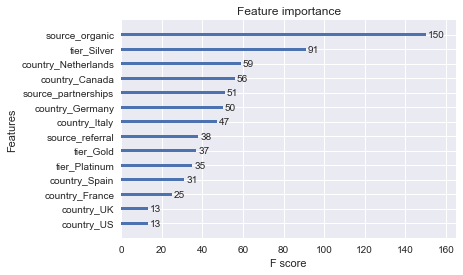

(0.9236259338313767, 0.53545065016526527)


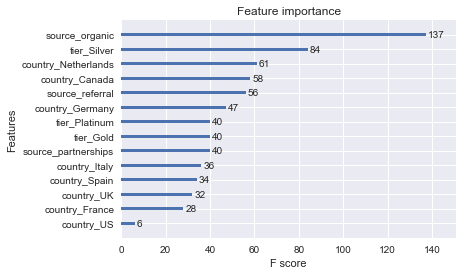

(0.92419290288153677, 0.52496724697996844)


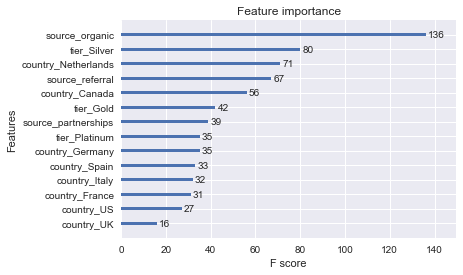

(0.92579375667022412, 0.51358933080420544)


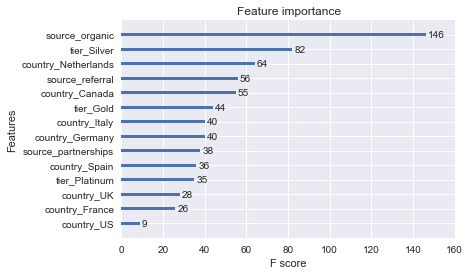

(0.92626067235859122, 0.51106468392549398)


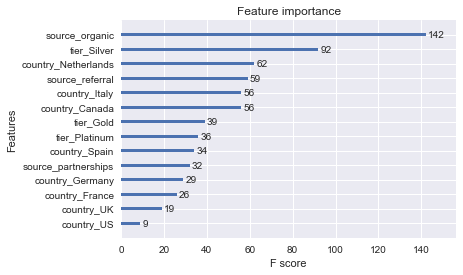

(0.92439300960512272, 0.53341146687582974)


In [26]:
iterations = 5

for i in range(iterations):
    print xgb_class(x, y, 0.3, i)